In [4]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [11]:
samples = ["2Mu2E_100GeV_0p25GeV_20mm"]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", "pvAndCosmic_cuts"] #"2mu2e"
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts


In [13]:
# Should I be using basenolJ orpvandcosmic for channel

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

                             ┌───────────────────────────────────────────────┐
[     -inf,         0) 0     │                                               │
[        0, 0.0002167) 43.75 │███████▎                                       │
[0.0002167, 0.0004333) 53.16 │████████▉                                      │
[0.0004333,   0.00065) 37.71 │██████▎                                        │
[  0.00065, 0.0008667) 30.66 │█████▏                                         │
[0.0008667,  0.001083) 53.39 │████████▉                                      │
[ 0.001083,    0.0013) 45.03 │███████▌                                       │
[   0.0013,  0.001517) 32.15 │█████▍                                         │
[ 0.001517,  0.001733) 33.68 │█████▋                                         │
[ 0.001733,   0.00195) 25.37 │████▎                                          │
[  0.00195,  0.002167) 21.75 │███▋                                           │
[ 0.002167,  0.002383) 26.81 │████▌                 

Text(0, 1, 'Δηseed')

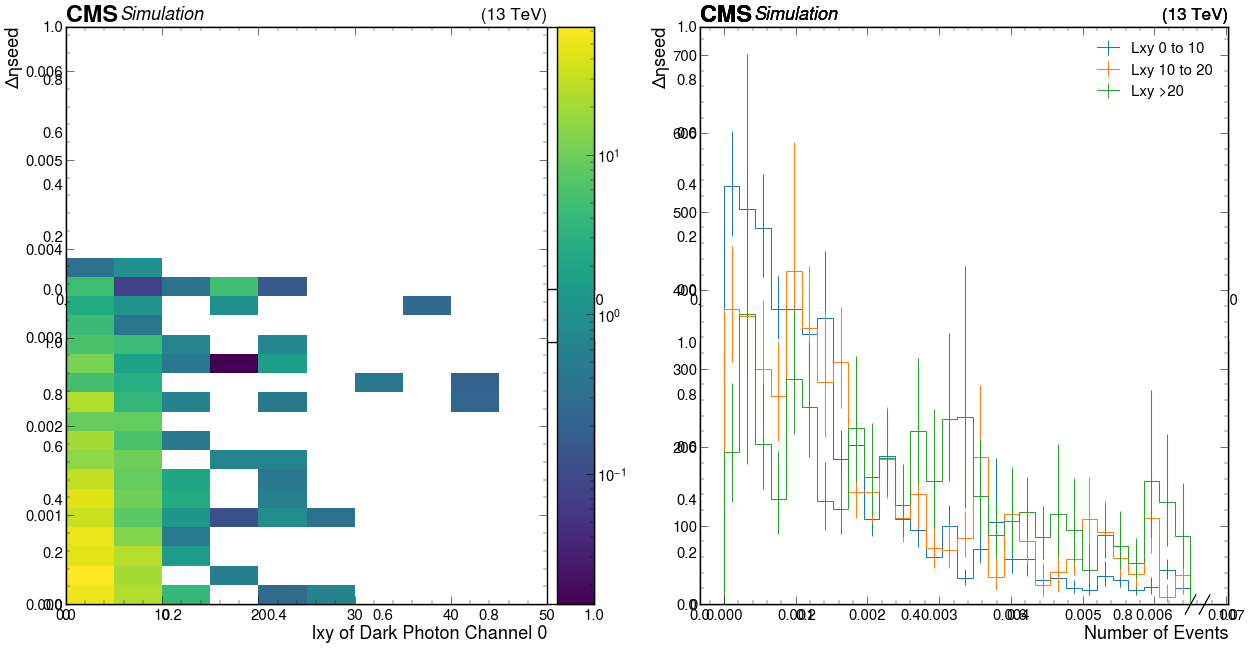

In [15]:
 for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δηseed")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Δηseed")

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

                             ┌───────────────────────────────────────────────┐
[    -inf,        0) 0       │                                               │
[       0, 0.001286) 2.181   │█████▊                                         │
[0.001286, 0.002571) 0       │                                               │
[0.002571, 0.003857) 0.09792 │▎                                              │
[0.003857, 0.005143) 0       │                                               │
[0.005143, 0.006429) 0       │                                               │
[0.006429, 0.007714) 0       │                                               │
[0.007714,    0.009) 0.6179  │█▋                                             │
[   0.009,  0.01029) 0.6119  │█▋                                             │
[ 0.01029,  0.01157) 3.491   │█████████▎                                     │
[ 0.01157,  0.01286) 0       │                                               │
[ 0.01286,  0.01414) 0       │                      

Text(0, 1, '∆φin')

/opt/conda/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


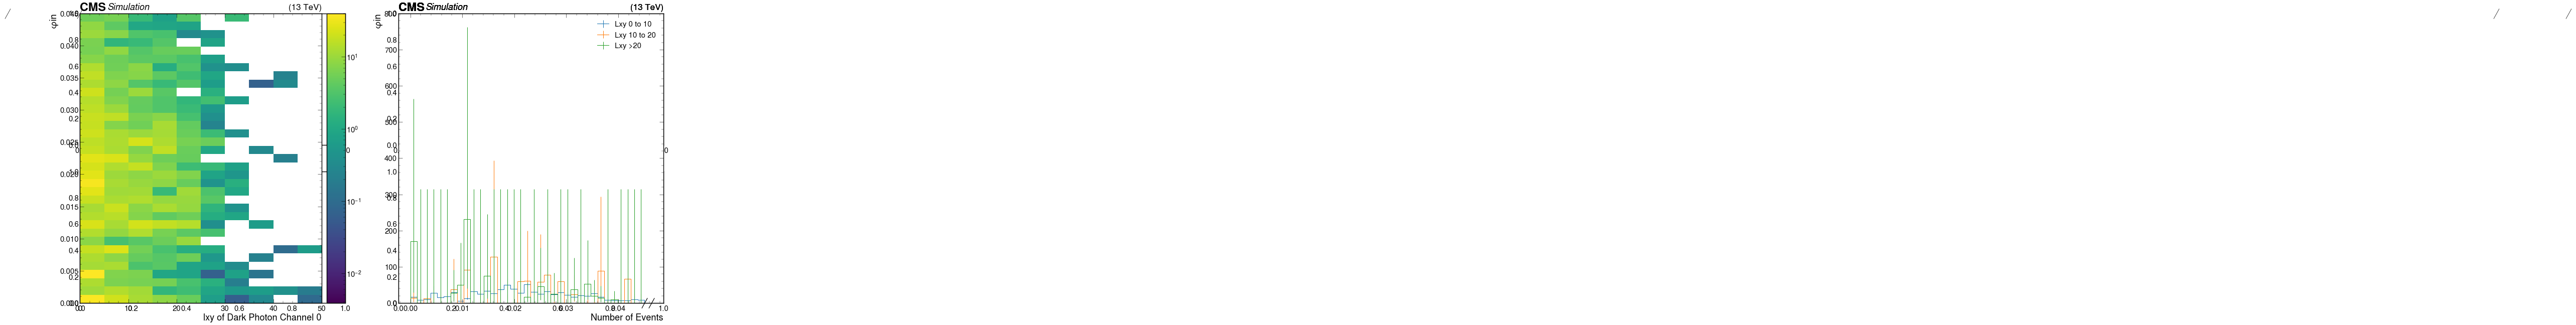

In [16]:
 for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("∆φin")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("∆φin")

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.

                             ┌───────────────────────────────────────────────┐
[    -inf,        0) 0       │                                               │
[       0, 0.006667) 133.7   │█████████████████████████████████████▉         │
[0.006667,  0.01333) 162.4   │██████████████████████████████████████████████ │
[ 0.01333,     0.02) 95.26   │███████████████████████████                    │
[    0.02,  0.02667) 47.14   │█████████████▍                                 │
[ 0.02667,  0.03333) 37.39   │██████████▋                                    │
[ 0.03333,     0.04) 34.18   │█████████▋                                     │
[    0.04,  0.04667) 32.99   │█████████▍                                     │
[ 0.04667,  0.05333) 40.91   │███████████▋                                   │
[ 0.05333,     0.06) 30.75   │████████▊                                      │
[    0.06,  0.06667) 29.88   │████████▌                                      │
[ 0.06667,  0.07333) 14.14   │████                  

Text(0, 1, '|1/E - 1/p|')

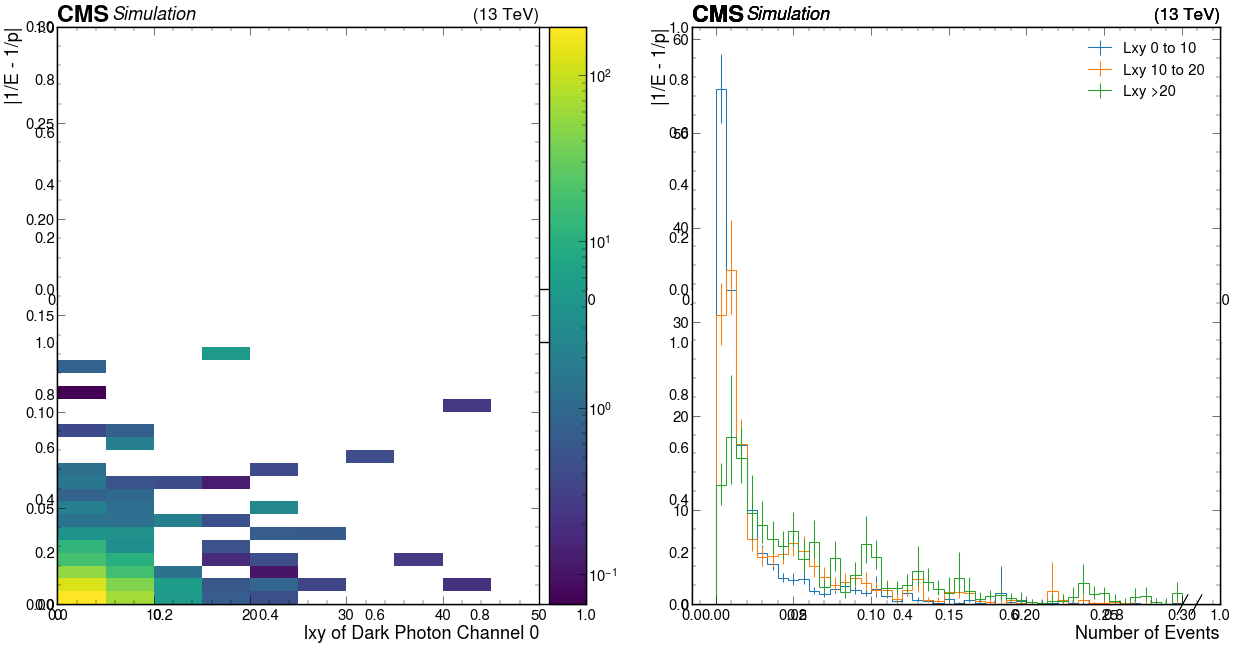

In [40]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("|1/E - 1/p|")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("|1/E - 1/p|")

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

                      ┌──────────────────────────────────────────────────────┐
[ -inf,     0) 0      │                                                      │
[    0, 0.005) 371.4  │█████████████████████████████████████████████████████ │
[0.005,  0.01) 52.06  │███████▍                                              │
[ 0.01, 0.015) 24.8   │███▌                                                  │
[0.015,  0.02) 39.02  │█████▋                                                │
[ 0.02, 0.025) 24.01  │███▍                                                  │
[0.025,  0.03) 22.57  │███▎                                                  │
[ 0.03, 0.035) 23.41  │███▍                                                  │
[0.035,  0.04) 15.62  │██▎                                                   │
[ 0.04, 0.045) 18.45  │██▋                                                   │
[0.045,  0.05) 11.25  │█▋                                                    │
[ 0.05, 0.055) 13.91  │██                           

Text(0, 1, 'Isolation')

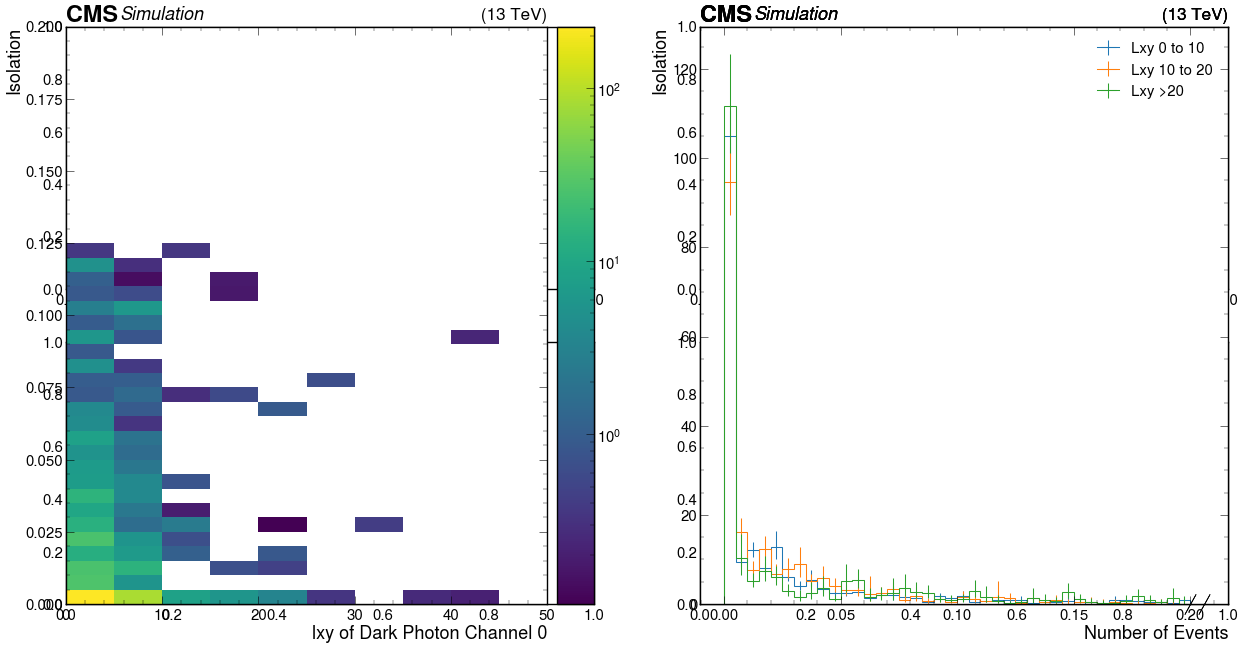

In [41]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Isolation")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation")

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

                           ┌─────────────────────────────────────────────────┐
[    -inf,        0) 0     │                                                 │
[       0, 0.001286) 358.2 │████████████████████████████████████████████████ │
[0.001286, 0.002571) 2.635 │▍                                                │
[0.002571, 0.003857) 2.834 │▍                                                │
[0.003857, 0.005143) 8.243 │█▏                                               │
[0.005143, 0.006429) 13.73 │█▉                                               │
[0.006429, 0.007714) 17.42 │██▍                                              │
[0.007714,    0.009) 7.779 │█                                                │
[   0.009,  0.01029) 13.48 │█▊                                               │
[ 0.01029,  0.01157) 7.957 │█▏                                               │
[ 0.01157,  0.01286) 4.106 │▌                                                │
[ 0.01286,  0.01414) 6.613 │▉                       

Text(0, 1, 'Isolation')

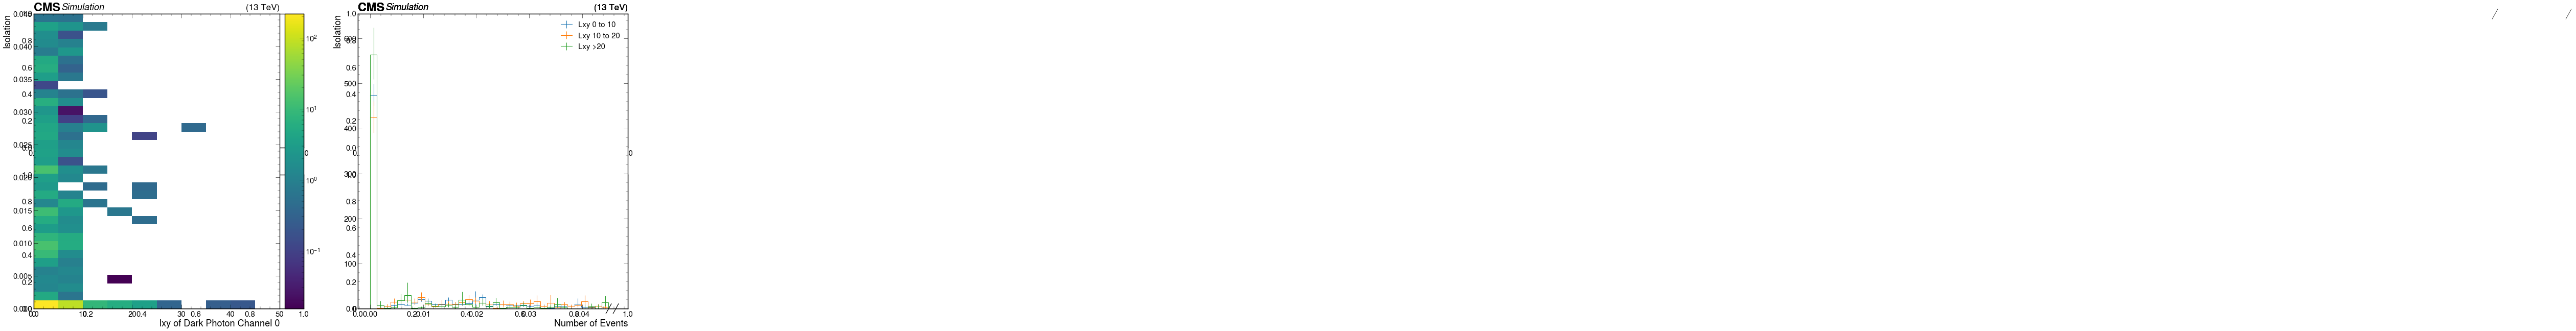

In [42]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Isolation")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation")

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

                  ┌──────────────────────────────────────────────────────────┐
[-inf,   0) 0     │                                                          │
[   0,   1) 126.1 │████████▊                                                 │
[   1,   2) 816.1 │█████████████████████████████████████████████████████████ │
[   2, inf) 0     │                                                          │
                  └──────────────────────────────────────────────────────────┘


Text(0, 1, 'Conversion Veto')

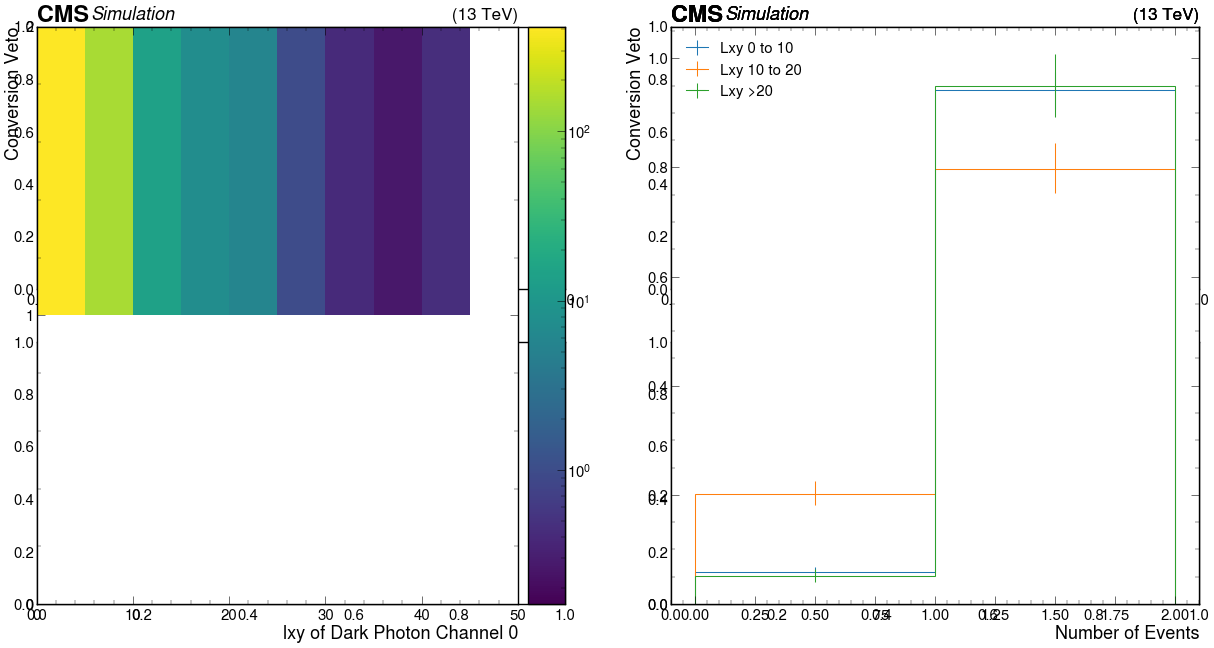

In [43]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Conversion Veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Conversion Veto")

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

                      ┌──────────────────────────────────────────────────────┐
[ -inf,     0) 0      │                                                      │
[    0, 0.005) 583.2  │█████████████████████████████████████████████████████ │
[0.005,  0.01) 19.87  │█▊                                                    │
[ 0.01, 0.015) 37.67  │███▍                                                  │
[0.015,  0.02) 51.86  │████▊                                                 │
[ 0.02, 0.025) 31.61  │██▉                                                   │
[0.025,  0.03) 24.27  │██▎                                                   │
[ 0.03, 0.035) 12.72  │█▏                                                    │
[0.035,  0.04) 13.33  │█▎                                                    │
[ 0.04, 0.045) 9.128  │▉                                                     │
[0.045,  0.05) 10.84  │█                                                     │
[ 0.05, 0.055) 8.353  │▊                            

Text(0, 1, 'H/E')

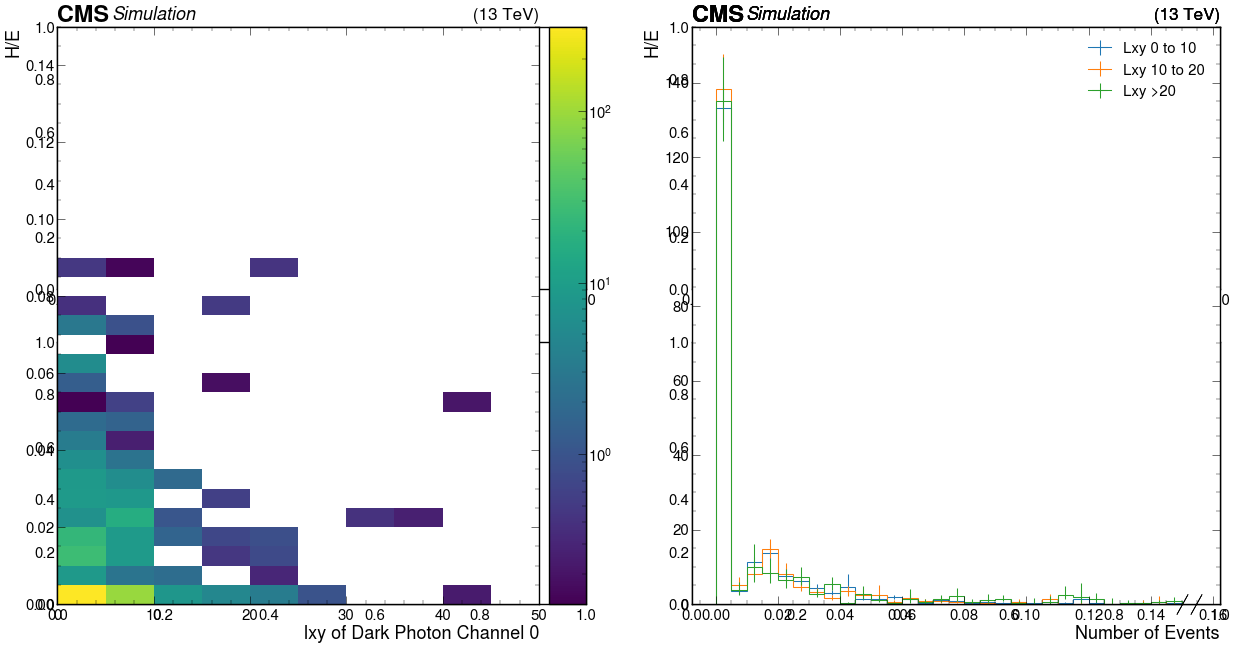

In [45]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("H/E")

# Expected missing inner hits:

number of missing hits expected for GSF track.

                  ┌──────────────────────────────────────────────────────────┐
[-inf,   0) 0     │                                                          │
[   0,   1) 8.415 │███████████████████▊                                      │
[   1,   2) 24.32 │█████████████████████████████████████████████████████████ │
[   2,   3) 0     │                                                          │
[   3,   4) 0     │                                                          │
[   4,   5) 0     │                                                          │
[   5,   6) 0     │                                                          │
[   6,   7) 0     │                                                          │
[   7,   8) 0     │                                                          │
[   8,   9) 0     │                                                          │
[   9,  10) 0     │                                                          │
[  10, inf) 0     │                                 

Text(0, 1, 'H/E')

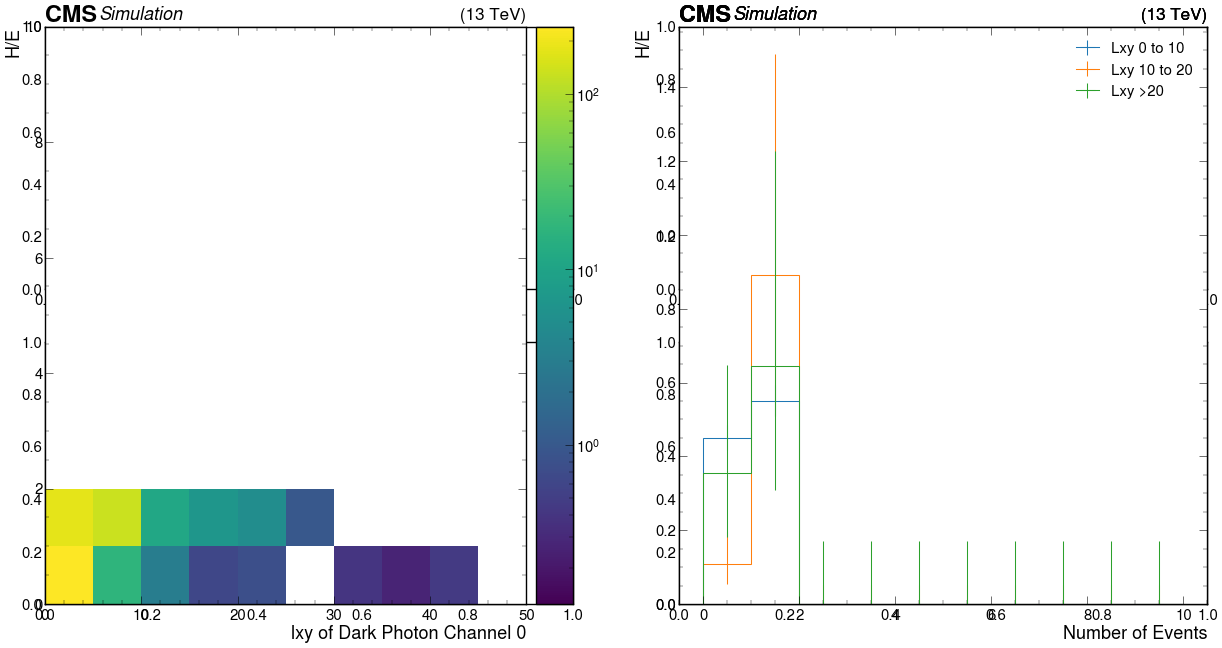

In [47]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("H/E")